# Projet numérique : choix du pas de temps

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Préliminaires

On dit qu'un modèle est convergent d'ordre $p$ si on peut trouver $c_v$ tel que, si on note $J$ l'ensemble des points de calcul, on ait $\underset{1 \leq j \leq J}{max} \phantom{x} ||x^j - x(t_j)|| \leq c_v (\Delta t)^p$.

## Pas fixe
#### Convergence d'un schéma d'ordre 1

On défini ici la fonction mettant en place la méthode Euler explicite pour résoudre une équation différentielle décrite par le système suivant : si on note $x$ la fonction qui fait l'objet du système différentiel, on va résoudre l'équation $\overset{.}{x}
= f(x,t)$. On aura $\Delta t = dt$ puisque tous les pas de temps sont constants.

In [3]:
def solve_euler_explicit(f, x0, dt, tf, t0 = 0):
    """
    Systemes de la forme : Up = f(U, t)
    Description de f : f = (lambda U, t : ...)
                        --> si Up et/ou U et/ou t n'apparait pas dans le systeme diff, ne pas le.s mentionner dans les ...
    """
    t = np.arange(t0, tf + dt, dt)
    x = [x0]
    for tk in t[:-1]:
        x += [x[-1] + dt * f(x[-1], tk)]
    x = np.array(x)
    return(t, x)

On choisi l'exemple de la fonction exponentielle que l'on connaît bien : en notant $u = exp$, on a $\overset{.}{u}
= u$. On a donc : $f = u$

On codera donc en entrée de la fonction $solve\_euler\_explicit$ la fonction $f$ par $f = lambda \phantom{x} u : u$. On choisi l'intervalle de temps $[t_0, t_f] = [0, 3$

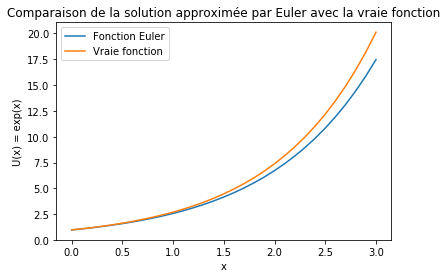

In [4]:
dt = 0.1
t, x = solve_euler_explicit(lambda u, t : u, 1, dt, 3, 0)
vraie_fonction = np.exp(t)
plt.plot(t, x, label = 'Fonction Euler')
plt.plot(t, vraie_fonction, label = 'Vraie fonction')
plt.xlabel('x')
plt.ylabel('U(x) = exp(x)')
plt.title('Comparaison de la solution approximée par Euler avec la vraie fonction')
plt.legend()
plt.show()

On cherche désormais à prouver la convergence du schéma Euler explicite à l'ordre 1. On choisi donc plusieurs $\Delta t = dt$ rassemblés dans un vecteur noté $dt$. On visualise alors la convergence à l'ordre 1 par le fait que le maximum des erreurs pour $dt_i$ est bien inférieur à $c_v . dt_i$

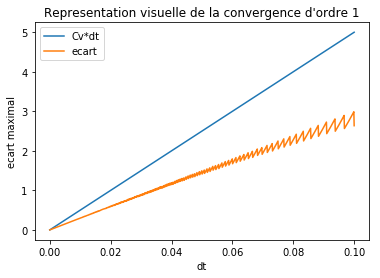

In [5]:
dt = np.linspace(0.00001, 0.1, 1000)
ecart = []
for dti in dt:
    t, x = solve_euler_explicit(lambda u, t : u, 1, dti, 3, 0)
    vraie_fonction = np.exp(t)
    ecart += [max(abs(x - vraie_fonction))]
c_v = 50
conv_ordre_1 = c_v * dt
ecart = np.array(ecart)
plt.plot(dt, conv_ordre_1, label = 'Cv*dt')
plt.plot(dt, ecart, label = 'ecart')
plt.xlabel('dt')
plt.ylabel('ecart maximal')
plt.title("Representation visuelle de la convergence d'ordre 1")
plt.legend()
plt.show()

#### Convergence d'un schéma d'ordre 2

In [7]:
def solve_euler_explicit(f, x0, dt, tf, t0 = 0):
    """
    Systemes de la forme : Up = f(U, t)
    Description de f : f = (lambda U, t : ...)
                        --> si Up et/ou U et/ou t n'apparait pas dans le systeme diff, ne pas le.s mentionner dans les ...
    """
    t = np.arange(t0, tf + dt, dt)
    x = [x0]
    for tk in t[:-1]:
        x += [x[-1] + dt * f(x[-1] + 0.5*dt*f(x[-1],tk), tk + 0.5*dt)]
    x = np.array(x)
    return(t, x)

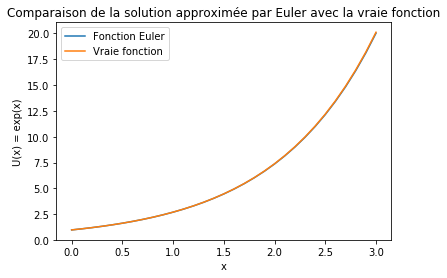

In [8]:
dt = 0.1
t, x = solve_euler_explicit(lambda u, t : u, 1, dt, 3, 0)
vraie_fonction = np.exp(t)
plt.plot(t, x, label = 'Fonction Euler')
plt.plot(t, vraie_fonction, label = 'Vraie fonction')
plt.xlabel('x')
plt.ylabel('U(x) = exp(x)')
plt.title('Comparaison de la solution approximée par Euler avec la vraie fonction')
plt.legend()
plt.show()

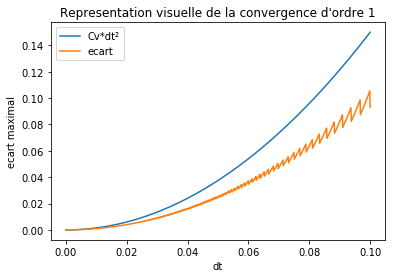

In [9]:
dt = np.linspace(0.00001, 0.1, 1000)
ecart = []
for dti in dt:
    t, x = solve_euler_explicit(lambda u, t : u, 1, dti, 3, 0)
    vraie_fonction = np.exp(t)
    ecart += [max(abs(x - vraie_fonction))]
c_v = 15
conv_ordre_1 = c_v * dt * dt
ecart = np.array(ecart)
plt.plot(dt, conv_ordre_1, label = 'Cv*dt²')
plt.plot(dt, ecart, label = 'ecart')
plt.xlabel('dt')
plt.ylabel('ecart maximal')
plt.title("Representation visuelle de la convergence d'ordre 1")
plt.legend()
plt.show()